# Neural net for sms-spam using keras
we will be training neural net on text data, which is a csv file containing list of spam and not spam short messages. since the data is a text data,not digit or floating point data which the neural network are familiar with. we will need to convert it to data that the neural net can feed upon.

Their are different way to convert text data to what neural net can feed on. we can use `word-vector`,word-embedding. we will be using `word to vector` here. 

`Word to vector` can be represented using one-hot encoding, which is common but, here we will be using,Tfidf vectorizer, this create a matrix,with each data-point representing the frquency of each unique word in a document, and the idf(inverse document frequency) i.e the number of time they don't occur in the documents.

In [1]:
import numpy as np # linear algebra
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.calibration import *
# from sklearn.linear_model import *
# from sklearn.multiclass import *
# from sklearn.svm import *
import pandas
from tensorflow import keras


# from subprocess import check_output
# # print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
data = pandas.read_csv('spam.csv', encoding='latin-1')

we will be using the tf-idf from scikit-learn,the term `tf` stand for `term frequency` which measure number of time the word appear in a document.idf-inverse document frquency, which help to penelaize word which appear to common. e.g the word `The` appear mostly in most document but does not tell us anything about the document, such word like `The` will be penelaize.

In [8]:
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer()
vectorize_text = vectorizer.fit_transform(data.v2).toarray()

The matrix word vector is build in relative to the unique word called feature names generated from the text. This feature name then will be the number of column for the matrix and the row is the number of text(document).

In [12]:
len(vectorizer.get_feature_names())

8672

In [13]:
print(vectorize_text.shape)

(5572, 8672)


After formatting the text data into what the neural net can use we also need to format the label.Since the label contain word ham and spam. we can represent them in binary representation, such as `0` stands for `ham` and `1` stands for `spam`.

In [40]:
label =data.v1.values.copy()
label[label=='ham']=0
label[label=='spam']=1

In [41]:
label[:20]

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1],
      dtype=object)

To split my data and shuffle them at the same time, i found `train_test_split` the best at that.so we split our data to train and test, with 10% for testing and 90% for training

In [21]:
X_train,X_test,y_train,y_test = train_test_split(vectorize_text,label,random_state=42,test_size=0.10)

In [22]:
#get validation data
val_data = X_train[:1000]
val_label = y_train[:1000]
X_train = X_train[1000:]
y_train = y_train[1000:]
print(len(X_train))

4014


We would like to make our data have a good distribution. so we normalize them by making sure they are centered at `zero` and we divide it by the standard deviation.But since our data are floating point data already and of very small value, dividing them by zero might bring error or ambiguous value, hence the neural net might not learn anything.

In [23]:
#mean centered
mean=X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -=mean

X_test -=mean

val_data -=mean


In [24]:
print(X_train[0])

[-3.86596552e-04 -1.17770129e-03 -5.79079546e-05 ... -7.20037324e-05
 -2.71902839e-04 -8.96494658e-05]


Since we are using tensorflow high level layer called keras, its make the model easier to build.All we need is to call the `keras` `models` and `layers`. The network will be a 3 layer network, one hidden layer.16 weighted neurons and one output neuron. Since, the label is binary it will be prefferable to use `binary_crossenthropy` instead of `softmax-crossentropy`.

In [25]:
models = keras.models
layers = keras.layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(8672,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                138768    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 139,057
Trainable params: 139,057
Non-trainable params: 0
_________________________________________________________________


In [27]:
print(y_train.shape)

(4014,)


To train the model, we use `model.fit`. We set the number of time we want to see all the data, which is called `epochs`. Since the training is using `minibatch gradient descent`, we would not pass all of our data at the same time.But for each iteration we pass the data batch-by-batch and update the weight and then we output the cumulative loss at the end of each epochs.

In [28]:
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                   batch_size=200,
                   validation_data=(val_data,val_label))

Train on 4014 samples, validate on 1000 samples
Epoch 1/20
4014/4014 [==============================] - 3s 639us/step - loss: 0.6402 - acc: 0.8642 - val_loss: 0.5789 - val_acc: 0.8610
Epoch 2/20
4014/4014 [==============================] - 1s 280us/step - loss: 0.5362 - acc: 0.8652 - val_loss: 0.4756 - val_acc: 0.8610
Epoch 3/20
4014/4014 [==============================] - 1s 268us/step - loss: 0.4318 - acc: 0.8652 - val_loss: 0.3776 - val_acc: 0.8610
Epoch 4/20
4014/4014 [==============================] - 1s 324us/step - loss: 0.3357 - acc: 0.8652 - val_loss: 0.2945 - val_acc: 0.8610
Epoch 5/20
4014/4014 [==============================] - 1s 310us/step - loss: 0.2562 - acc: 0.8919 - val_loss: 0.2337 - val_acc: 0.9090
Epoch 6/20
4014/4014 [==============================] - 1s 335us/step - loss: 0.1970 - acc: 0.9557 - val_loss: 0.1922 - val_acc: 0.9500
Epoch 7/20
4014/4014 [==============================] - 1s 311us/step - loss: 0.1544 - acc: 0.9768 - val_loss: 0.1647 - val_acc: 0.9580


In [29]:
import matplotlib.pyplot as plt
history = history.history

In [42]:
history.keys() #store the loss and acuracy

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

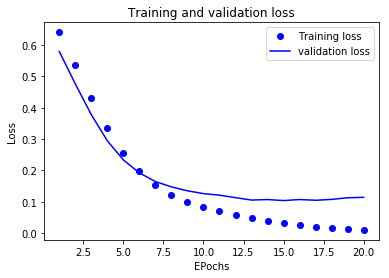

In [31]:
loss_values = history['loss']
val_loss_values = history['val_loss']
epochs = range(1,21)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('EPochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

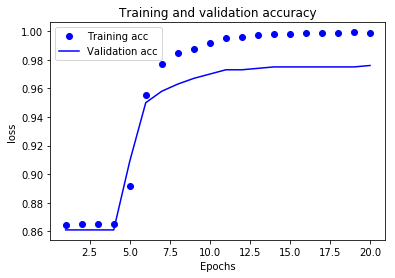

In [32]:
plt.clf()
acc_values = history['acc']
val_acc_values = history['val_acc']

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

From the accuracy graph , we can see that the model did not over fit much, since the gap between the training acccuracy and the validation accuracy is small.you can still train the network to get an higher accuracy, may be by increasing the model capacity,increase the number of weight,and regularizer e.t.c

In [33]:
result = model.evaluate(X_test,y_test)

558/558 [==============================] - 0s 200us/step


Evaluate the model with the test data,we get an accuracy of 0.99 that is 99%.wow! that cool :)

In [34]:
print(result)#0.9 accuracy

[0.05727166076788285, 0.9910394265232975]


In [35]:
prediction = model.predict(X_test)

In [36]:
prediction.shape

(558, 1)

Test the network with a spam message

In [37]:
d = vectorizer.transform(["text win to 5050,to win your lottery"]).toarray()


In [38]:
print(d[0].shape)

(8672,)


In [39]:
c = d[0]
model.predict_classes(d)

array([[1]], dtype=int32)

In [43]:
#neural network is more intuitve in prediction compare to svm